How to calculate slope ? 

https://www.archtoolbox.com/calculating-slope/

library we use:

https://scipy.org/

pip install scipy



In [1]:
# install lib we need
! pip install scipy
! pip install pandas 
! pip install plotly
! pip install ccxt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 58.2 MB/s 
     |████████████████████████████████| 1.1 MB 45.3 MB/s 
     |████████████████████████████████| 4.1 MB 33.3 MB/s 
     |████████████████████████████████| 271 kB 50.5 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 291 kB 80.5 MB/s 
     |████████████████████████████████| 144 kB 55.5 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully un

In [2]:
# { import libraries
import ccxt
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import linregress
# }

In [26]:
# { load exchange to get data
exchange = ccxt.binance({
    'options': {
        'adjustForTimeDifference': True,
    },

})
# }

In [27]:
# { load data as function
def fetch(symbol: str, timeframe: str, limit: int):
    print(f"Fetching {symbol} new bars for {datetime.now().isoformat()}")

    bars = exchange.fetch_ohlcv(
        symbol, timeframe=timeframe, limit=limit)  # fetch ohlcv
    df = pd.DataFrame(bars[:-1], columns=['timestamp',
                      'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    #df = df.set_index(pd.DatetimeIndex(df.timestamp))
    return df
# }

In [30]:
# { set symbol for data function
BTC = fetch('BTC/USDT', '4h', 1000)
# }

# print data
BTC

Fetching BTC/USDT new bars for 2022-07-22T12:47:54.176766


,timestamp,open,high,low,close,volume
0,2022-02-06 00:00:00,41382.60,41640.00,41340.35,41444.04,2064.25705
1,2022-02-06 04:00:00,41444.03,41714.18,41305.29,41612.33,2267.93171
2,2022-02-06 08:00:00,41612.32,41700.01,41444.00,41522.00,2030.31116
3,2022-02-06 12:00:00,41522.00,42168.00,41116.56,41519.49,7364.57563
4,2022-02-06 16:00:00,41519.48,41747.40,41417.23,41717.94,2735.98951
...,...,...,...,...,...,...
994,2022-07-21 16:00:00,22639.37,23207.94,22632.72,23194.40,35494.11017
995,2022-07-21 20:00:00,23194.40,23308.80,22931.35,23152.19,23278.87786
996,2022-07-22 00:00:00,23152.19,23352.53,22861.43,22909.90,18175.45307
997,2022-07-22 04:00:00,22907.25,23320.00,22805.89,23118.79,23234.33239


In [31]:
# { function to calculate sma
def SMA(data: str, length: int, column: str):
    return data[column].rolling(window=length).mean()
# }

BTC['sma'] = SMA(BTC, 20, 'close')  # use function for  calculate sma

BTC['sma'] #print sma

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
994    22902.9185
995    22926.7365
996    22991.3355
997    23025.6460
998    23110.9975
Name: sma, Length: 999, dtype: float64

In [32]:
# { function to calculate EMA 
def EMA(data: str, src: str, Length: int, smoothing=2):
    EMA = np.zeros(np.size(data[src]))
    emasize = np.size(data[src])
    EMA[:Length-1] = np.NaN
    EMA[Length-1] = np.mean(data[src][:Length])
    for i in range(Length, emasize):
        EMA[i] = (((smoothing/(Length + 1)) * data[src][i]) +
                  ((1-(smoothing/(Length + 1))) * EMA[i-1]))
    return np.round(EMA, 2)
# }

In [33]:
BTC['ema'] = EMA(BTC, 'close', 20)  # use function to calculate ema 

BTC['ema'] #print ema

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
994    22773.45
995    22809.52
996    22819.08
997    22847.63
998    22920.29
Name: ema, Length: 999, dtype: float64

In [34]:
# set src and len to calculate slpoe

src = 'sma' # also use ema or ohlc 
len = 4 # back data to calculate slop

In [35]:
#{ function to calculate slope
def SLOPE(src:str = src , len:int =len ,data:str = BTC):
  return data[src].rolling(len).apply(lambda s: linregress(s.reset_index())[0])

In [36]:
BTC['slope'] = SLOPE() # use function to calculate slope 

BTC['slope'] #print slope

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
994    43.73485
995    34.31335
996    44.82325
997    43.27815
998    58.70935
Name: slope, Length: 999, dtype: float64

In [38]:
# { plot data
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

fig.add_trace(go.Candlestick(x=BTC.index,
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close'],
                             showlegend=False))
fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['slope'],
                         opacity=0.7,
                         line=dict(color='Gray', width=2),
                         name='slope'), row=2, col=1)
fig.show()
# }

In [ ]:
#change slope color whit condition for ploting
BTC['slope_avg'] = BTC['slope'].rolling(window=len).mean()
BTC['long']=np.where((BTC['slope'] > 0 ) & (BTC['slope'] > BTC['slope_avg'] ) ,BTC['slope'] , np.nan )
BTC['short']=np.where((BTC['slope'] < 0 ) & (BTC['slope'] < BTC['slope_avg'] ) ,BTC['slope'] , np.nan )

BTC


In [80]:
# { plot data
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

fig.add_trace(go.Candlestick(x=BTC.index,
                             open=BTC['open'],
                             high=BTC['high'],
                             low=BTC['low'],
                             close=BTC['close'],
                             showlegend=False))

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['long'],
                         opacity=1,
                         line=dict(color='green', width=2),
                         name='slope'), row=2, col=1)

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['short'],
                         opacity=1,
                         line=dict(color='red', width=2),
                         name='slopee'), row=2, col=1)

fig.add_trace(go.Scatter(x=BTC.index,
                         y=BTC['slope'],
                         opacity=0.4,
                         line=dict(color='Gray', width=2),
                         name='slope'), row=2, col=1)

# }

In [81]:
fig.show()

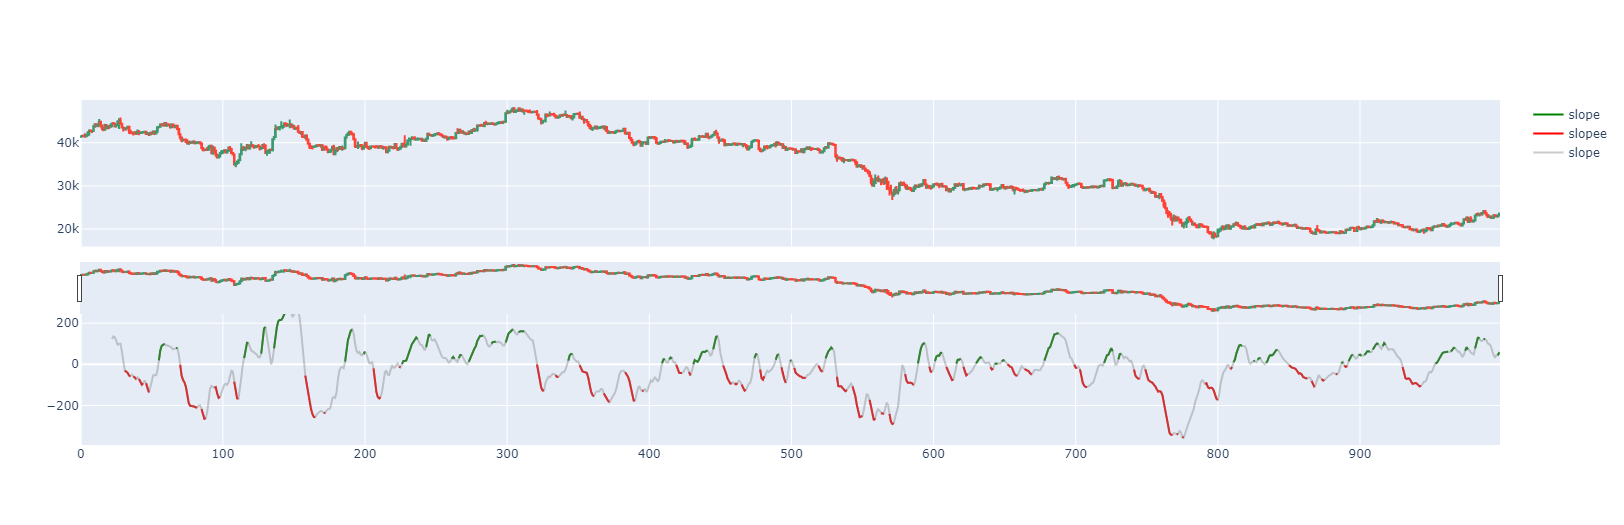